# RC Quantum Spin Dynamics Simulations #

### Preamble ###

In [27]:
from math import *
from cmath import *
from sympy import *
from qutip import *

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = "cm"

### Variables ###

In [28]:
n=20 # Number of harmonic oscillator levels

In [91]:
gratio = 1.76*10**(11) # Gyromagnetic ratio
bz = 10 # External magnetic field along z
omegaL = gratio*bz # Larmor frequency
A = 10*omegaL # Coupling Strength
omega0 = 4*omegaL # Resonant frequency
T = 1 # Temperature (Kelvin)
kB = 1.38*10**(-23) # Boltzmann constant
hbar = 1.05*10**(-34) # Reduced Planck constant
beta = (hbar*omega0)/(kB*T) # Beta factor

RC-specific variables:

In [92]:
Omega = omega0;
Lambda = np.sqrt(A/Omega);

### Initial States ###

In [93]:
sx0 = 0.5*sigmax()
sy0 = 0.5*sigmay()
sz0 = 0.5*sigmaz()
s0 = [sx0, sy0, sz0]

In [94]:
identity_sys = qeye(2)
identity_bath = qeye(n)

In [95]:
def htot():
    hsys = tensor(s0[2],identity_bath)
    hint = Lambda*tensor(s0[0], (create(n)+destroy(n)))
    hrc = -(Omega/omegaL)*tensor(identity_sys, create(n)*destroy(n))
    return(hsys+hint+hrc)

In [109]:
htot()

Quantum object: dims = [[2, 20], [2, 20]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[  0.5   0.    0.  ...   0.    0.    0. ]
 [  0.   -3.5   0.  ...   0.    0.    0. ]
 [  0.    0.   -7.5 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... -68.5   0.    0. ]
 [  0.    0.    0.  ...   0.  -72.5   0. ]
 [  0.    0.    0.  ...   0.    0.  -76.5]]

In [97]:
def evolve(operator,t):
    unitary_lhs = (1j*htot()*t).expm()
    unitary_rhs = (-1j*htot()*t).expm()
    return(unitary_lhs*(operator*unitary_rhs))

In [98]:
theta, phi = -np.pi/2, 0 

In [99]:
rho_sys = Qobj([[np.cos((theta)/2)**2, 0.5*exp(-1j*phi)*np.sin(theta)],[0.5*exp(1j*phi)*np.sin(theta),np.sin((theta)/2)**2]])

In [100]:
rho_sys

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5 -0.5]
 [-0.5  0.5]]

In [101]:
thermal_expectation = 1/(np.exp(beta)-1)

In [102]:
rho_th = thermal_dm(n, thermal_expectation)

In [103]:
rho_th

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 5.45659430e-024 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.97744214e-047 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+

In [104]:
rho0 = tensor(rho_sys, rho_th)

In [105]:
def s(i,t):
    return((rho0*evolve(tensor(s0[i], identity_bath),t)).tr().real)

In [106]:
t = np.arange(0,12*np.pi,0.15)

In [107]:
def s_list(i):
    list = np.zeros(len(t));
    for j in range(len(t)):
        list[j] = s(i,t[j])
    return(list)

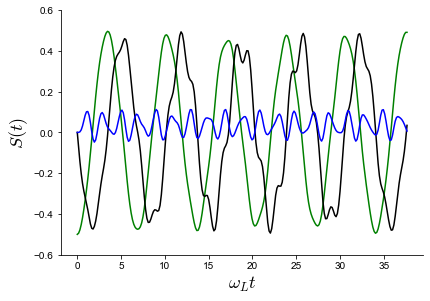

In [108]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))  #size in inches

# labeling

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_ylim(-0.6, 0.6)
ax.set_xlabel("$\omega_L t$", fontsize=18)
ax.set_ylabel("$S(t)$", fontsize=18)

##### data ######

ax.plot(t, s_list(0), 'g-')
ax.plot(t, s_list(1), 'k-')
ax.plot(t, s_list(2), 'b-')

plt.savefig('graph.jpg', dpi=300)